# Ford GoBike System Data

## Done by: Saad Alotaibi

## Introduction
> This data set is taken from ford go bike website and it represents trips taken by members of the service for month of February of 2019.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as tick
import datetime
from matplotlib import rcParams

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv("/Users/saad/Desktop/DAND/5. Communicate Data Findings/Case_Study/Final_Submission 2/201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Assess
1. `start_time` and `end_time` should be datetime 
2. `bike_id` should be int
3. `start_station_id` and `end_station_id` should be int 

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


1. minimum value of `member_birth_year` is 1878 and this is not possible
2. the maximum value of `duration_sec` translates to 23 hours which is odd but i'm not gonna drop this observation

In [6]:
# alot of null values in `member_birth_year` and `member_gender` specifically 8265 rows
# 8265 rows missing in start_station_name and id and end stations
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# the vast majority of members are subscribers
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
# mostly Males and 3652 are 'Other' we will keep these records as they are
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

### Quality issues found

1. `start_time` , `end_time` should be date

2. `start_station_id`, `end_station_id` should be int

3. `member_birth_year` should be int

4. `bike_id` should be int

5. `user_type` should be category

6. `bike_share_for_all_trip` should be category

7. there are 203 rows where `member_birth_date` is less than 1945

8. 197 missing value for `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`

9. 8265 missing value for `member_birth_date` and `member_gender`

### Tidiness

1. create a separate columns for month, day, and time.

## Now we will start cleaning

In [9]:
# as always start by copying the dataframe
df_clean = df.copy()

In [10]:
#Fixing columns that have wrong data types
df_clean['start_time']    = df_clean['start_time'].astype('datetime64[ns]')
df_clean['end_time']      = df_clean['end_time'].astype('datetime64[ns]')
df_clean['bike_id']       = df_clean['bike_id'].astype(int)
df_clean['user_type']     = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [12]:
# Dropping records with missing member birth year
df_clean = df_clean[pd.notnull(df_clean['member_birth_year'])]

In [13]:
df_clean['member_birth_year'].isnull().sum()

0

In [14]:
# Changing the type of column for member birth year to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [15]:
# Making sure it is integer
df_clean['member_birth_year'].sample(3)

117588    1985
181578    1992
45028     1985
Name: member_birth_year, dtype: int64

In [16]:
# Dropping records with missing start_station_name
df_clean = df_clean[pd.notnull(df_clean['start_station_name'])]

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [18]:
# Now I will create columns for month, day, and hour
#create date, day,time column
df_clean['trip_month']  = df_clean.start_time.dt.strftime('%b')
df_clean['trip_day']    = df_clean.start_time.dt.strftime('%a')
df_clean['trip_hour']   = df_clean.start_time.dt.strftime('%H')

### converting 3 column dtypes to int using lambda function and a for loop to prevent repetitive code

In [19]:
columns_to_int = ['trip_hour', 'start_station_id', 'end_station_id']

for column in columns_to_int:
    df_clean[column] = df_clean[column].astype(int)

In [20]:
df_clean['end_station_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: end_station_id
Non-Null Count   Dtype
--------------   -----
174952 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


In [21]:
# Checking our dataframe
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Feb,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Feb,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Feb,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Feb,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Feb,Thu,23


In [22]:
# creating Age column for visualizations
df_clean['age'] = 2022 - df_clean['member_birth_year']

In [23]:
#let's create a column for minutes
df_clean['trip_minute'] = df_clean['duration_sec'] / 60

In [24]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour,age,trip_minute
180470,562,2019-02-01 10:56:55.748,2019-02-01 11:06:18.307,24,Spear St at Folsom St,37.789677,-122.390428,3,Powell St BART Station (Market St at 4th St),37.786375,...,5502,Subscriber,1974,Female,Yes,Feb,Fri,10,48,9.366667
165398,195,2019-02-05 07:16:25.560,2019-02-05 07:19:41.228,355,23rd St at Tennessee St,37.755367,-122.388795,130,22nd St Caltrain Station,37.757288,...,1282,Subscriber,1976,Male,No,Feb,Tue,7,46,3.250000
165044,450,2019-02-05 07:50:06.290,2019-02-05 07:57:36.699,219,Marston Campbell Park,37.809824,-122.280192,160,West Oakland BART Station,37.805318,...,3464,Subscriber,1975,Female,No,Feb,Tue,7,47,7.500000
165794,475,2019-02-04 22:11:28.636,2019-02-04 22:19:24.581,104,4th St at 16th St,37.767045,-122.390833,125,20th St at Bryant St,37.759200,...,5319,Subscriber,1991,Male,No,Feb,Mon,22,31,7.916667
139913,895,2019-02-07 19:54:32.772,2019-02-07 20:09:28.629,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,1044,Subscriber,1991,Female,No,Feb,Thu,19,31,14.916667


# Univariate Exploration

## PieChart of User Distribution

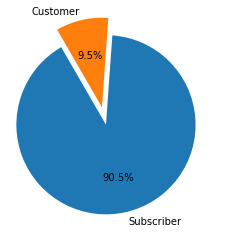

In [25]:
user_category = df_clean['user_type'].value_counts()


plt.pie(user_category, explode=(0, 0.2),
        labels = user_category.index, startangle = 120, autopct='%1.1f%%');
plt.axis('square');

> Most users are  subscribers (90.5% of total users) who are using the program more than actual customers who represents only 9.5% of total users.

## Function to prevent repetitve coding

In [45]:
def label(x, y, t):
    """
    Args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
    
    Returns:
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

# Histogram of Members birth year distribution

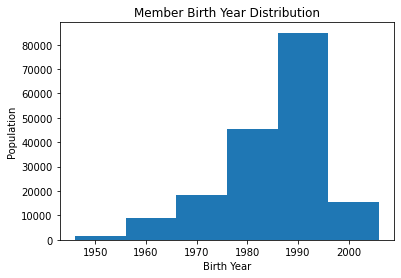

In [52]:
bins = np.arange(1946, df_clean['member_birth_year'].max()+10, 10)

plt.hist(data = df_clean, x = 'member_birth_year', bins = bins)
label("Birth Year", "Population", "Member Birth Year Distribution")

> As we can see that most of the users birth years are from 1975 to 1995

# Barchart of Gender

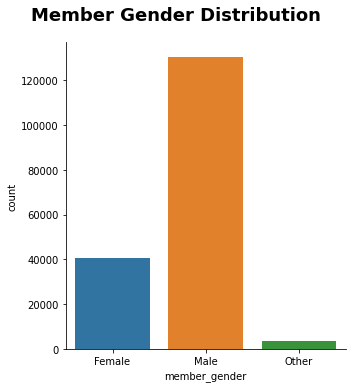

In [27]:
ax = sb.catplot(data=df_clean, x='member_gender', kind='count')
ax.fig.suptitle('Member Gender Distribution', y = 1.07, fontsize = 18, fontweight = 'bold');

> From the barplot above we see the Males dominate this dataset and Females after, and the 'Other' are the lowest in bike usage

# Daily Usage Barchart

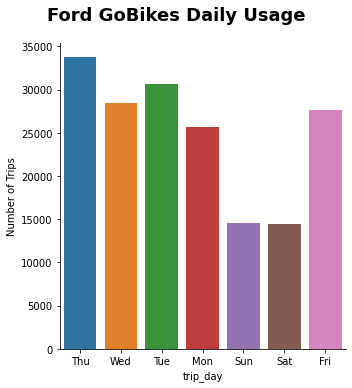

In [28]:
#Ford GoBikes System Daily Usage
ax = sb.catplot(data=df_clean, x='trip_day', kind='count')


ax.fig.suptitle('Ford GoBikes Daily Usage', y = 1.07, fontsize = 18, fontweight = 'bold')
ax.set_ylabels('Number of Trips');

> It looks like the number of trips in most days are between 25,000 and roughly 33,000 

> except in Sunday and Saturday which are lower

# Hourly Usage Distribution

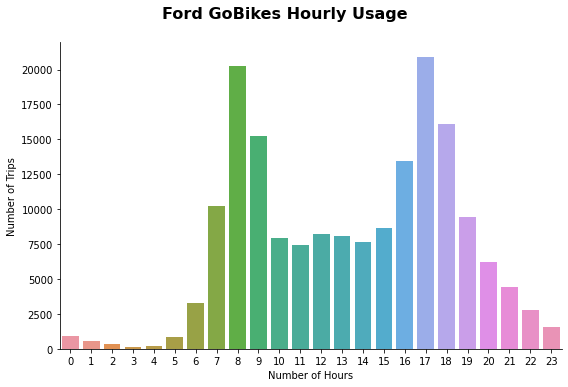

In [29]:
ax = sb.catplot(data = df_clean, x='trip_hour', kind='count', aspect = 1.6)
ax.set_axis_labels('Number of Hours', 'Number of Trips')


ax.fig.suptitle('Ford GoBikes Hourly Usage', y=1.07, fontsize=16, fontweight='bold');

> From observing the peak-times of when users use the Ford GoBike System. The hours are mainly high between the morning from (8 AM) and in (17 and 18 which is 5 to 6 PM) in the afternoon.

In [30]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour,age,trip_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,Feb,Thu,17,38,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,Feb,Thu,12,50,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,Feb,Thu,17,33,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,Feb,Thu,23,48,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,Feb,Thu,23,63,29.883333


In [31]:
df_clean['trip_minute'].mean()

11.733379060161264

# histogram of the duration bike rides in minutes 

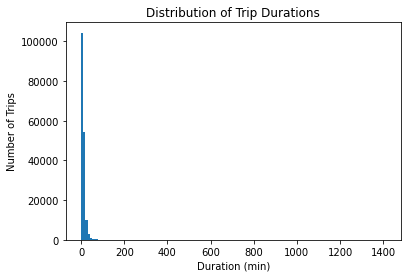

In [57]:
# histogram of the duration bike rides in minutes 
bins = np.arange(0, df_clean['trip_minute'].max()+10, 10)


plt.hist(data = df_clean, x = 'trip_minute', bins = bins)
label('Duration (min)', 'Number of Trips', 'Distribution of Trip Durations')

### now we have to transform it to make more understandable

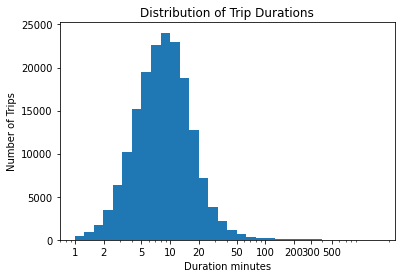

In [69]:
# logarthmic scale transformation on a histogram
# there's a long tail in the distribution, so let's put it on a log scale instead
bins = 10 ** np.arange(0.0, np.log10(df_clean['trip_minute'].max()) + 0.1, 0.1)
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 300, 500]

plt.hist(data = df_clean, x = 'trip_minute', bins = bins)
plt.xscale("log")
plt.xticks(tick_locs, tick_locs)
label('Duration minutes', 'Number of Trips', 'Distribution of Trip Durations')

> Duration has a long tailed distribution. When plotted on a log-scale, the duration distribution looks roughly bimodal, with one peak between 5 and 10. Most of the bike trips lasts between 5 and 15 minutes. 

In [34]:
np.log10(df_clean.trip_minute.describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: trip_minute, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I needed to have to perform a log transform in the minutes duration. The data looked bimodal under the log transformation with one peak between 5 and 10 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusal distributuons. Each variable explored showed what you would expect.

# Bivariate Exploration

# Boxplot of Duraction VS. Type of user

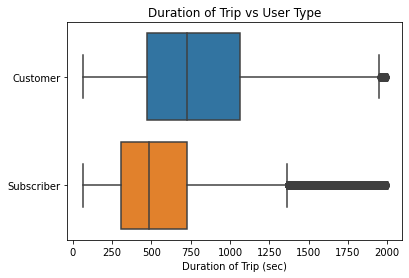

In [72]:
general = df_clean[df_clean['duration_sec']<2000]

sb.boxplot(data =general , y='user_type', x='duration_sec')
label("Duration of Trip (sec)", "", 'Duration of Trip vs User Type')

> Graphic shows that customers have more duration of trip than subscribers. Interesting! perhaps it was because it its their first experience and they wanted to ride longer?

# Gender VS. Duration in seconds

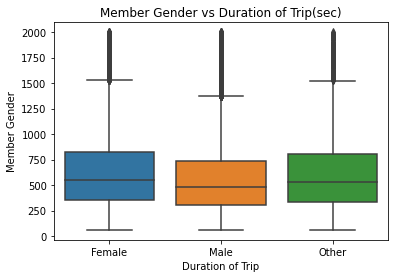

In [73]:
general = df_clean[df_clean['duration_sec']<2000]


sb.boxplot(x="member_gender", y="duration_sec", data=general)
label("Duration of Trip", "Member Gender", "Member Gender vs Duration of Trip(sec)");

> Graphic shows that duration of trip distribution regarding to genders. Duration of trip is quite less for man gender but it is quite similar for female and others gender

# Scatter Age VS. trip duration (min)

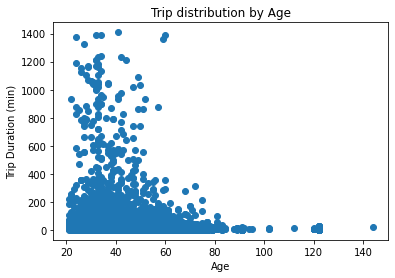

In [74]:
# scatter charts showing distribution between age and trip duration
# plt.figure(figsize=[8,5])
plt.scatter(data = df_clean, x = 'age', y ='trip_minute')
label('Age', 'Trip Duration (min)', 'Trip distribution by Age')

> Vast Majority of rides are for Users between ages 25 and 45 to 50 showing the inverse relationship between age and the trip duration.

# usage between Customers vs Subscribers

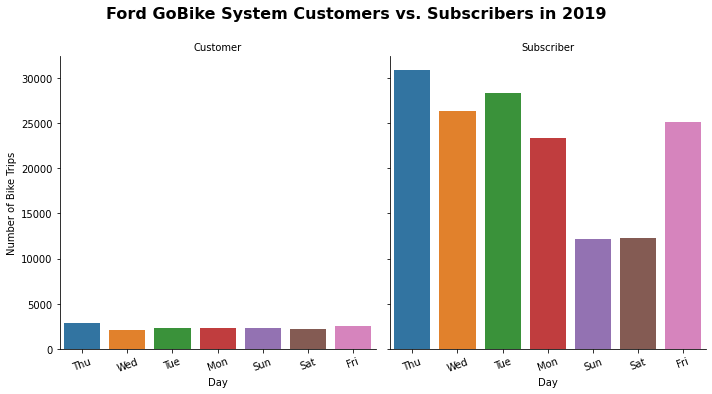

In [38]:
# comparison of usage between Customers vs Subscribersin 2019
graph = sb.catplot(data=df_clean, x='trip_day', col="user_type", kind='count', sharey = True);


graph.set_axis_labels("Day", "Number of Bike Trips");
graph.set_titles("{col_name}");
graph.fig.suptitle('Ford GoBike System Customers vs. Subscribers in 2019', 
                   y=1.07, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=20);

> As we can see the subscribers are way more using the bikes than the customers

# point plot customer VS. Subscriber

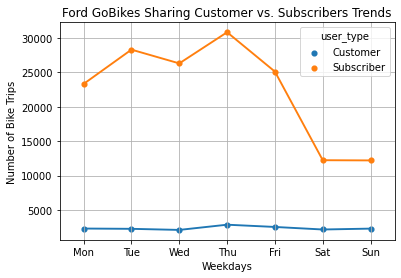

In [78]:
df_clean['trip_day']
df_cleaned_user_week = df_clean.groupby(['trip_day', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=df_cleaned_user_week, x='trip_day', 
                  y=0, hue = 'user_type', scale=.7, order = weekday);

plt.grid()
label("Weekdays", "Number of Bike Trips", "Ford GoBikes Sharing Customer vs. Subscribers Trends")

> customers usage is low and consistant staying under 5,000 bike trips during the week. on the other hand Subscribers frequently used the the Ford GoBikes Sharing platform during Monday - Thursday with a drop of the number of bike trips on Thursday and a it is consistent from saturday to friday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The importance of including the user type to the data analysis revealed that there were some differences in the behaviour of the customers and subscribers using the Ford GoBikes Sharing platform.

>The dataset highlights the usage trends between customers and subscribers. This suggests that Customers are casual users and the Subscribers are daily commuters that maybe working, studying etc.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Through Observation, there is a difference in usage between customers and subscribers. The popularity of using Ford GoBikes for Subscribers is mostly on Thursday and decreases more on Friday as opposed to Costumers where it is relativly stable and way less than the subscribers

# Comparing Gender VS. type of user

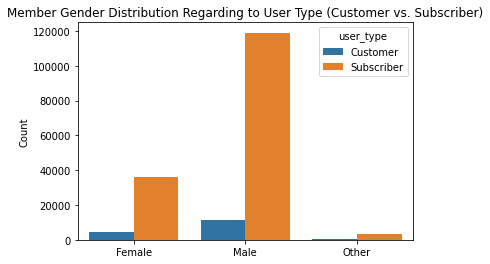

In [80]:
ax = sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type')

ax.set_autoscale_on(True)
label("", "Count", "Member Gender Distribution Regarding to User Type (Customer vs. Subscriber)")

> Graphic shows that over than 2.000 female are subscriber it is way more for male gender. 

> Roughly 120.000 male members are subscriber. Subcribers are more than customers for male, female and other genders.

# Multivariate Exploration

# point plot of trip duration VS. gender

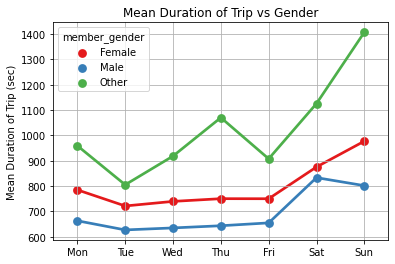

In [82]:
sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_sec', hue = 'member_gender',
             order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], palette=['#e41a1c', '#377eb8', '#4daf4a'], 
             ci=None)
plt.grid()
label("", "Mean Duration of Trip (sec)", "Mean Duration of Trip vs Gender")

> As we can see that the 'Other' gender has the most fluctuation and an increase from Friday

> Male and Female are relatively stable compared to the 'Other' gender but all of them has an increase from Friday 

In [42]:
general_age = df_clean[df_clean['member_birth_year'] > 1980]

# lmplot of Age VS. Duration of trip 

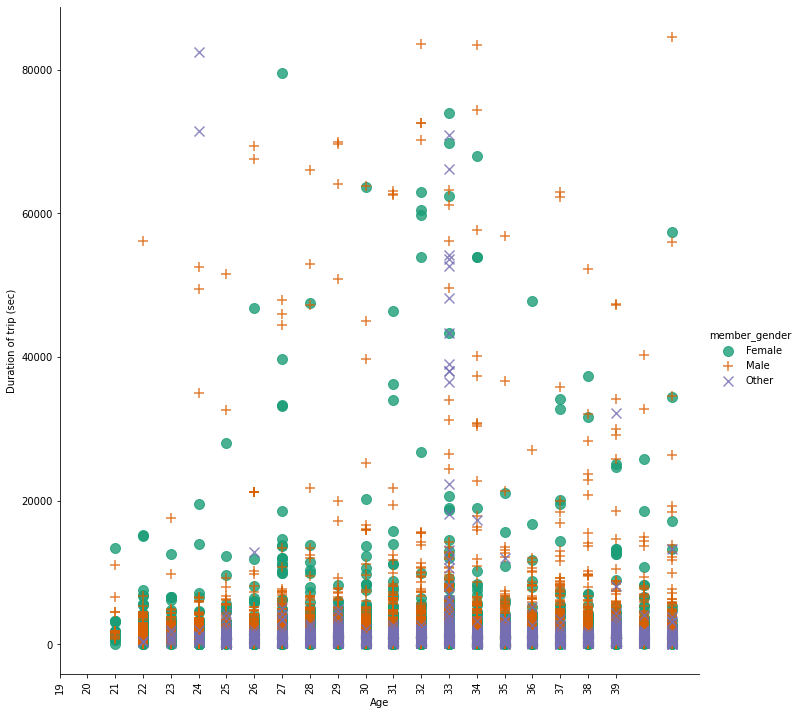

In [84]:
sb.lmplot(data = general_age, x = 'age', y = 'duration_sec', hue = 'member_gender', palette = 'Dark2',
       fit_reg = False, scatter_kws={"s": 100}, height = 10, markers=["o","+","x"])
plt.title('Age vs Duration of Trip Regarding to Gender', fontsize=24)

plt.xticks(range(19,40,1))
plt.xticks(rotation=90)
label("Age", "Duration of trip (sec)", "")

> User who has highest duration of trip and is 19 years old is female. 

> User who has more duration of trip than 8.000 second is male.

# Scatter plots of Age VS. gender and Duration (min)

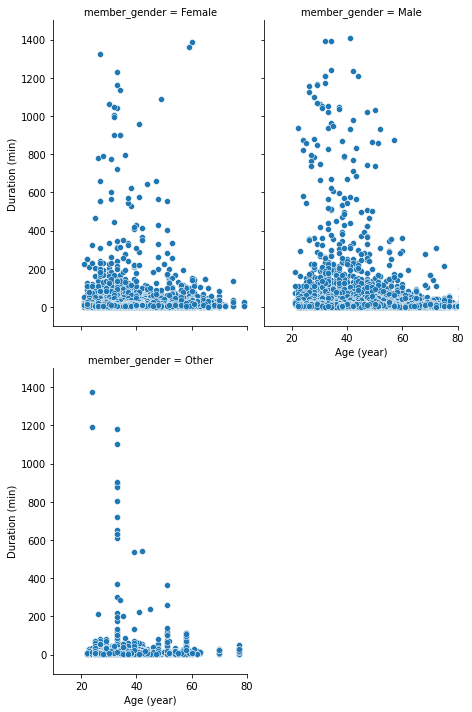

In [44]:
g = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 2, 
                  height = 5, aspect =0.65, xlim = [10, 80], ylim = [-100, 1500])
g.map_dataframe(sb.scatterplot, 'age', 'trip_minute', alpha= None)
g.set_axis_labels('Age (year)', 'Duration (min)')
g.add_legend()
plt.show()

> Comparing the gender types as it relates to trip duration, the age 20 to 40 represents the group that does most of the rides. 

> Females and males do appear to have similar ride average

# SUMMARY

- In this project, I got the data from udaicty data lists provided, I assessed and cleaned data at wrangling phase and prepared for analysis. Later I started analysis data step by step.

- Quality issues were mostly incorrect data types and there were some missing values. I decided to delete rows of missing information. Finally I started to analysis data.

### Univariate Plots
First I did univariate exploration. Here is my question to ask myself.

1. Users Distribution (pie chart): Subscribers were 90.5% while Customers are 9.5%
2. Member Birth year Distibution (histogram): Most of the users birth year were between 1975 to 1995
3. Gender Distribution (bar chart): Males are the majority of this dataset, females are second and lastly are 'Other'
4. Daily usage Distribution (bar chart): Least of the rides are on Sunday which is a weekend, and Saturday
5. hourly usage Distribution (count plot): hours are mainly high between 8 AM and 6 to 5 PM.

## Bivariate Plots

1. Duration VS. User Type (box plot): Customers have more duration of trip than subscribers.
2. Gender vs Duration in seconds (box plot): Duration of trip is quite less for the male gender but it is quite similar for female and others gender
3. Trip Duration (min) (scatter):Majority of rides are for Users between ages 25 and (45 - 50) showing an inverse relationship between age and the trip duration.
4. Customers vs. Subscribers Usage in days (bar chart): The subscribers are way more using the bikes than the customers

## Multivariate Plots

1. Mean Duration of Trip vs Gender (point plot): the 'Other' gender has the most fluctuation and an increase from Friday. Male and Female are relatively stable compared to the 'Other' gender but all of them has an increase from Friday

2. Age vs Duration of Trip Regarding to Gender (lmplot): the user who has highest duration of trip and is 19 years old is female. User who has more duration of trip than 8.000 second is male.

3. Duration VS. Gender Types VS. Age (Facetgrid scatterplot): Comparing the gender types as it relates to trip duration, the age 20 to 40 represents the group that does most of the rides. Females and males do appear to have similar ride average